In [1]:
import pandas as pd
import numpy as np

In [3]:
"""
EVALUATING CLASSIFIERS: HOW WELL A MODEL GENERALISES OUT-OF-SAMPLE DATA.

MODEL EVALUATION PROCEDURES: 
    
    1) TRAINING & TESTING THE SAME DATA: PROBLEM WITH OVERFITTING
    
    2) TRAIN / TEST SPILT: USEFUL DUE TO SIMPLICITY - HOWEVER HIGH VARIANCE 
    
    3) K-FOLD CROSS VALIDATION: LOWER VARIANCE BUT COMPUTATIONALLY EXPENSIVE 

MODEL EVALUATION METRICS: 
    
    1) REGRESSION: MAE; MSE; RMSE.
    2) CLASSIFICATION: ACCURACY
    
CONFUSION MATRIX - Table that describes the performance of Classification model
    
"""

'\nEVALUATING CLASSIFIERS: HOW WELL A MODEL GENERALISES OUT-OF-SAMPLE DATA.\n\nMODEL EVALUATION PROCEDURES: \n    \n    1) TRAINING & TESTING THE SAME DATA: PROBLEM WITH OVERFITTING\n    \n    2) TRAIN / TEST SPILT: USEFUL DUE TO SIMPLICITY - HOWEVER HIGH VARIANCE \n    \n    3) K-FOLD CROSS VALIDATION: LOWER VARIANCE BUT COMPUTATIONALLY EXPENSIVE \n\nMODEL EVALUATION METRICS: \n    \n    1) REGRESSION: MAE; MSE; RMSE.\n    2) CLASSIFICATION: ACCURACY\n    \nCONFUSION MATRIX - Table that describes the performance of Classification model\n    \n'

In [104]:
path = 'C:\\Users\\qraza\\OneDrive for Business\\Personal\\Python\\ML\\diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, names = col_names, header=None) 
pima = pima[1:]
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [105]:
"""
can we predict the diabetes status of patients based on their health measurements?
we will focus on 4 features: pregnant; insulin; bmi; and age
label: 1 if diabetes and 0 if not
"""

'\ncan we predict the diabetes status of patients based on their health measurements?\nwe will focus on 4 features: pregnant; insulin; bmi; and age\nlabel: 1 if diabetes and 0 if not\n'

In [106]:
feature_cols = ['pregnant','insulin','bmi','age']

X = pima[feature_cols]
y = pima.label


In [107]:
#import cross-val
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)


In [108]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)

C:\Users\qraza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [109]:
#Accuracy 70%

from sklearn import metrics 
print (metrics.accuracy_score(y_test,y_pred_class))

0.6927083333333334


In [110]:
#how many 1s & 0s were in y_test?
y_test.value_counts()


0    130
1     62
Name: label, dtype: int64

In [111]:
#percentage of 1s & 0s in y_test
y_test.value_counts(normalize = True)


0    0.677083
1    0.322917
Name: label, dtype: float64

In [112]:
""" 
the above is known as NULL accuracy - the accuracy achieved if model always
predicts the most frequent class.
NOTE: both accuracy and NULL accuracy are 68% - this questions the validity 
of our model - the accuracy doesnt tell us anything about the underlying distribution of 
our data.
Lets compare the the y_test & y_pred_class responses
NOTE: when the true value is zero, the model will almost always predict zero

"""


' \nthe above is known as NULL accuracy - the accuracy achieved if model always\npredicts the most frequent class.\nNOTE: both accuracy and NULL accuracy are 68% - this questions the validity \nof our model - the accuracy doesnt tell us anything about the underlying distribution of \nour data.\nLets compare the the y_test & y_pred_class responses\nNOTE: when the true value is zero, the model will almost always predict zero\n\n'

In [113]:
print('True', y_test[:25])
print('Pred', y_pred_class[:25])


True 662    1
123    0
114    0
15     1
530    0
104    0
339    1
589    1
396    0
205    0
32     1
547    1
279    0
594    0
738    0
203    0
176    1
56     0
480    0
366    0
418    1
578    1
173    0
353    0
28     0
Name: label, dtype: object
Pred ['0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0']


In [114]:
"""
Introducing Confusion Matrix
results in 2x2 matrix in this case as responses are binary
format is NOT univesal
TN(118), FP(12), FN(47), TP(15)

TN: negative prediction for negative response, i.e. when response 0 prediction also 0 
FP: positive prediction for negative response - pred 1 actual 0 (Type I error)
FN: negative prediction for positive response - not diabection prediction when the patient had diabetes (Type II error)
TP: Positive prediction for position response - positive in this case means response of 1

"""

'\nIntroducing Confusion Matrix\nresults in 2x2 matrix in this case as responses are binary\nformat is NOT univesal\nTN(118), FP(12), FN(47), TP(15)\n\nTN: negative prediction for negative response, i.e. when response 0 prediction also 0 \nFP: positive prediction for negative response - pred 1 actual 0 (Type I error)\nFN: negative prediction for positive response - not diabection prediction when the patient had diabetes (Type II error)\nTP: Positive prediction for position response - positive in this case means response of 1\n\n'

In [130]:
print(metrics.confusion_matrix(y_test,y_pred_class)) #good practice to list true value as the first argument

[[118  12]
 [ 47  15]]


In [131]:
confusion = metrics.confusion_matrix(y_test,y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]


In [132]:
y_test.dtype
y_pred_class.dtype
y_test = y_test.astype('float')
y_pred_class = y_pred_class.astype('float')

In [133]:
#Confusion Matrix Image
from PIL import Image
img = Image.open('C:\\Users\\qraza\\OneDrive for Business\\Personal\\Python\\ML\\ConfusionMatrix.png')

img.show()


In [134]:
"""
Metrics from Confusion Matrix
1) Classification Accuracy - Overall accuracy
2) Classification Error (Misclassification rate) - Overall how often incorrect
3) Sensitivity OR Recall - when actual positive - how accurate
4) Specificity - when actual negative - how accurate - Note: Sensitivity & Specificity have an inverse relationship
5) False Positive Rate - when actual negative - how inaccurate 
6) Precision - when positive value predicted, how accurate 

Confusion Metrics provide a more complete pic on how well the model is performing
Choice would depend on business case: 
    1) Spam: optimise on Precision / Specificity - FN -  better to have spam email in inbox than ham in junk
    2) Fraud detection: optimise for Sensitivity - emphasis on FP - better to wrongly predict fraud 
    than wrongly predict non-fraud 
"""

'\nMetrics from Confusion Matrix\n1) Classification Accuracy - Overall accuracy\n2) Classification Error (Misclassification rate) - Overall how often incorrect\n3) Sensitivity OR Recall - when actual positive - how accurate\n4) Specificity - when actual negative - how accurate - Note: Sensitivity & Specificity have an inverse relationship\n5) False Positive Rate - when actual negative - how inaccurate \n6) Precision - when positive value predicted, how accurate \n\nConfusion Metrics provide a more complete pic on how well the model is performing\nChoice would depend on business case: \n    1) Spam: optimise on Precision / Specificity - FN -  better to have spam email in inbox than ham in junk\n    2) Fraud detection: optimise for Sensitivity - emphasis on FP - better to wrongly predict fraud \n    than wrongly predict non-fraud \n'

In [135]:
#Classification Accuracy
print((TP+TN)/float(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test, y_pred_class))


0.6927083333333334
0.6927083333333334


In [136]:
#Misclassification Rate
print((FP+FN)/float(FP+FN+TP+TN))
print(1-metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


In [137]:
#Sensitivity / Recall

print(TP / float(TP + FN))
#print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775


In [138]:
#Specificity
print((TN/float(TN+FP)))

0.9076923076923077


In [139]:
#False Positive Rate 
print(FP/float(TN+FP))


0.09230769230769231


In [141]:
#Precision
print(TP/float(TP+FP))
print(metrics.precision_score(y_test,y_pred_class))

0.5555555555555556
0.5555555555555556


In [142]:
"""Adjusting the classification Threshold
"""
#print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array(['0', '0', '0', '0', '0', '0', '0', '1', '0', '1'], dtype=object)

In [143]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [144]:
"""
the 2D array shows the probability of each class of response, i.e. prob of 0 & 1 respectively.
Where the probability of 1 (2nd column) is less than 50%, it predicts 0.
Results: 
    array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

Now, we want to focus on the positive (1) results, i.e. the 2nd column    
    
"""


'\nthe 2D array shows the probability of each class of response, i.e. prob of 0 & 1 respectively.\nWhere the probability of 1 (2nd column) is less than 50%, it predicts 0.\nResults: \n    array([[0.63247571, 0.36752429],\n       [0.71643656, 0.28356344],\n       [0.71104114, 0.28895886],\n       [0.5858938 , 0.4141062 ],\n       [0.84103973, 0.15896027],\n       [0.82934844, 0.17065156],\n       [0.50110974, 0.49889026],\n       [0.48658459, 0.51341541],\n       [0.72321388, 0.27678612],\n       [0.32810562, 0.67189438]])\n\nNow, we want to focus on the positive (1) results, i.e. the 2nd column    \n    \n'

In [145]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [146]:

# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

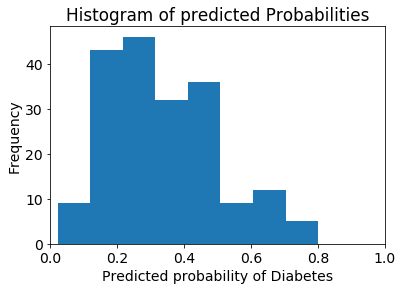

In [147]:
#Lets plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

plt.hist(y_pred_prob, bins = 8)
plt.xlim(0,1)
plt.title('Histogram of predicted Probabilities')
plt.xlabel('Predicted probability of Diabetes')
plt.ylabel('Frequency')


In [148]:
"""
Presently, the threshold is set at 0.5 or 50%. Therefore, anything below 50% would be 0 and above 1. 
We can increase / decrease this sensitivity depending on the problem. 
For example we may want to decrease the sensitivity to 30%, so that anything above 0.3 is 1. 
"""


'\nPresently, the threshold is set at 0.5 or 50%. Therefore, anything below 50% would be 0 and above 1. \nWe can increase / decrease this sensitivity depending on the problem. \nFor example we may want to decrease the sensitivity to 30%, so that anything above 0.3 is 1. \n'

In [149]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [150]:
y_pred_prob[0:10]


array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [151]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [152]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [153]:
y_test = y_test.astype('float', inplace = True)

In [154]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [155]:
# sensitivity has increased (used to be 0.24)
print(46 / float(46 + 16))

0.7419354838709677


In [156]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


In [157]:
"""
Conclusion:

Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
Threshold can be adjusted to increase sensitivity or specificity
Sensitivity and specificity have an inverse relationship
"""

'\nConclusion:\n\nThreshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions\nThreshold can be adjusted to increase sensitivity or specificity\nSensitivity and specificity have an inverse relationship\n'

In [158]:
"""
ROC Curves and Area Under the Curve (AUC)
Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

Answer: Plot the ROC curve!
"""

"\nROC Curves and Area Under the Curve (AUC)\nQuestion: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?\n\nAnswer: Plot the ROC curve!\n"

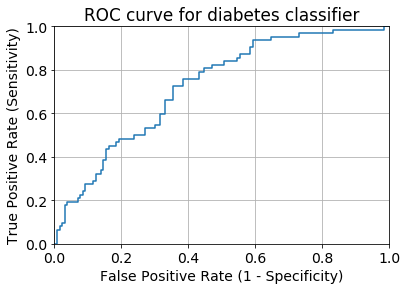

In [159]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#ROC curve can help you to choose a threshold that balances sensitivity and specificity 
#in a way that makes sense for your particular context


#You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [160]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [161]:
evaluate_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [162]:
#ideally we are looking for a threshold with high sensitivity and high specificity 
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


In [163]:
#Area under the Curve - high AUC value indicator of better classifier 
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


In [164]:
"""
AUC is useful as a single number summary of classifier performance.
If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
AUC is useful even when there is high class imbalance (unlike classification accuracy).
"""

'\nAUC is useful as a single number summary of classifier performance.\nIf you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.\nAUC is useful even when there is high class imbalance (unlike classification accuracy).\n'

In [165]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

C:\Users\qraza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qraza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qraza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qraza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qraza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

0.7378233618233618